<div style="width:20%px;margin-top:20px;margin-bottom:20px;"> </div>
<div style="width:80%px; text-align:left;float:right;word-wrap:break-word;font-size:x-Large;font-weight:bold;color:gray;border:1px gray;margin-top:20px;margin-bottom:20px;">
Kaggel road accident 
</div>  

### Create the hide function to hide and show cells on Jupyter notebook for better visualization 

In [1]:
#import html library to be able to read html tags
from IPython.display import HTML
import random

#function to hide and show code block
def hide_toggle(name,for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = name
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  #  JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle('Hide function')

### importing the required Libraries

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

  
# for drop down and other widget
from ipywidgets import widgets
from IPython.display import display, clear_output



#map library
import geopandas as gpd
from shapely.geometry import *

hide_toggle('Import Libraries')


/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
#loading the csv data
Motor_vehicle_ds=pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

hide_toggle('Load Data')

### check the dataset

In [4]:
Motor_vehicle_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412575 entries, 0 to 412574
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     412575 non-null  object 
 1   CRASH TIME                     412575 non-null  object 
 2   BOROUGH                        267336 non-null  object 
 3   ZIP CODE                       267266 non-null  float64
 4   LATITUDE                       379224 non-null  float64
 5   LONGITUDE                      379224 non-null  float64
 6   LOCATION                       379224 non-null  object 
 7   ON STREET NAME                 311091 non-null  object 
 8   CROSS STREET NAME              201138 non-null  object 
 9   OFF STREET NAME                101378 non-null  object 
 10  NUMBER OF PERSONS INJURED      412572 non-null  float64
 11  NUMBER OF PERSONS KILLED       412567 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED 

In [5]:
Motor_vehicle_ds.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,02/02/2021,0:00,NaN,NaN,NaN,NaN,NaN,NEW ENGLAND THRUWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4388602.0,Sedan,NaN,NaN,NaN,NaN
1,02/01/2021,0:15,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4388510.0,Sedan,Sedan,NaN,NaN,NaN
2,02/01/2021,15:30,NaN,NaN,40.697815,-73.7602,"(40.697815, -73.7602)",114 ROAD,NaN,NaN,...,NaN,NaN,NaN,NaN,4388639.0,Sedan,NaN,NaN,NaN,NaN
3,02/01/2021,2:35,NaN,NaN,NaN,NaN,NaN,PROSPECT EXPRESSWAY RAMP,NaN,NaN,...,NaN,NaN,NaN,NaN,4388200.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,10/27/2020,9:00,NaN,NaN,NaN,NaN,NaN,BRUCKNER EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4361834.0,commercial,Sedan,NaN,NaN,NaN


In [6]:
### check the percentage of missing value on the dataset 
NA_Percentage = round(Motor_vehicle_ds.isnull().sum() * 100 / len(Motor_vehicle_ds))
pd.DataFrame({'column': Motor_vehicle_ds.columns,
              'Number of ,missing value':Motor_vehicle_ds.isnull().sum(),
                                 'NA_percent_missing': NA_Percentage})



,column,"Number of ,missing value",NA_percent_missing
CRASH DATE,CRASH DATE,0,0.0
CRASH TIME,CRASH TIME,0,0.0
BOROUGH,BOROUGH,145239,35.0
ZIP CODE,ZIP CODE,145309,35.0
LATITUDE,LATITUDE,33351,8.0
LONGITUDE,LONGITUDE,33351,8.0
LOCATION,LOCATION,33351,8.0
ON STREET NAME,ON STREET NAME,101484,25.0
CROSS STREET NAME,CROSS STREET NAME,211437,51.0
OFF STREET NAME,OFF STREET NAME,311197,75.0


### Data insights
- first column name need to be modified for easy calling

- CRASH DATE ,CRASH TIME has no missing values.

- BOROUGH has 35% missing value which has to be filled as this is important information and we would use it when we create the map and I used  New York as a brough and general  New York zip code as I have found it here in https://ny.postcodebase.com/zipcode5/10018 zipcode=10018.

- for missing LATITUDE and LONGITUDE I have used also the general NY latitude and longitude https://www.latlong.net/place/new-york-city-ny-usa-1848.html latitude = 40.730610  and longitude = -73.935242, location= 40.730610,-73.935242

- As streets name, CONTRIBUTING factors and Vehicle not affecting our analysis I would fill it with 'Unspecified'  

- percentage of killing and ingered missing value is not significant so I will filled that with 0
 

### Dataset cleansing 

In [7]:
#renaming columns so It become more easy to use
def RenamingCol(data):
    data.rename(columns = {'CRASH DATE':'Date',
                         'CRASH TIME':'Time',
                         'ZIP CODE': 'ZIP',
                         'ON STREET NAME'    : 'On_Street',
                         'CROSS STREET NAME' : 'Cross_Street',
                         'OFF STREET NAME'   : 'Off_Street',
                         'NUMBER OF PERSONS INJURED'     : 'No_Injured',
                         'NUMBER OF PERSONS KILLED'      : 'No_Killed',
                         'NUMBER OF PEDESTRIANS INJURED' : 'P_Injured',
                         'NUMBER OF PEDESTRIANS KILLED'  : 'P_Killed',
                         'NUMBER OF CYCLIST INJURED'     : 'C_Injured',
                         'NUMBER OF CYCLIST KILLED'      : 'C_Killed',
                         'NUMBER OF MOTORIST INJURED'    : 'M_Injured',
                         'NUMBER OF MOTORIST KILLED'     : 'M_Killed',
                         'CONTRIBUTING FACTOR VEHICLE 1' : 'V_FACTOR_1',
                         'CONTRIBUTING FACTOR VEHICLE 2' : 'V_FACTOR_2',
                         'CONTRIBUTING FACTOR VEHICLE 3' : 'V_FACTOR_3',
                         'CONTRIBUTING FACTOR VEHICLE 4' : 'V_FACTOR_4',
                         'CONTRIBUTING FACTOR VEHICLE 5' : 'V_FACTOR_5',
                         'VEHICLE TYPE CODE 1' : 'V_TYPE_1',
                         'VEHICLE TYPE CODE 2' : 'V_TYPE_2',
                         'VEHICLE TYPE CODE 3' : 'V_TYPE_3',
                         'VEHICLE TYPE CODE 4' : 'V_TYPE_4',
                         'VEHICLE TYPE CODE 5' : 'V_TYPE_5'},
           inplace = True) 
    
hide_toggle('Renaming column')

In [8]:
#column renaming 
RenamingCol(Motor_vehicle_ds)

hide_toggle('Renameing colmn implementation')

In [9]:
#replace missing value with unknown string
def Handel_missingValue(data):
    
# Number of persons injured is the total of injured (pedestrians + cyclists + motorists)
# If the number is 0, it means 0 injures and 0 deaths in an incident, but it's still a record
    data.loc[data['BOROUGH'].isnull(), 'BOROUGH'] = 'New York'
    data.loc[data['ZIP'].isnull(), 'ZIP'] = '10018'
    data.loc[data['COLLISION_ID'].isnull(), 'COLLISION_ID'] = 'Unspecified'
    data.loc[data['LATITUDE'].isnull() , 'LATITUDE'] = '40.730610'
    data.loc[data['LONGITUDE'].isnull(), 'LONGITUDE'] = '-73.935242'
    data.loc[data['LOCATION'].isnull() , 'LOCATION'] = '(40.730610,-73.935242)'
    data.loc[data['On_Street'].isnull(), 'On_Street'] = 'Unspecified'
    data.loc[data['Cross_Street'].isnull(), 'Cross_Street'] = 'Unspecified'
    data.loc[data['Off_Street'].isnull(), 'Off_Street'] = 'Unspecified' 
    data.loc[data['V_FACTOR_1'].isnull(), 'V_FACTOR_1'] = 'Unspecified'
    data.loc[data['V_FACTOR_2'].isnull(), 'V_FACTOR_2'] = 'Unspecified' 
    data.loc[data['V_FACTOR_3'].isnull(), 'V_FACTOR_3'] = 'Unspecified' 
    data.loc[data['V_FACTOR_4'].isnull(), 'V_FACTOR_4'] = 'Unspecified' 
    data.loc[data['V_FACTOR_5'].isnull(), 'V_FACTOR_5'] = 'Unspecified' 
    data.loc[data['V_TYPE_1'].isnull(), 'V_TYPE_1'] = 'Unspecified' 
    data.loc[data['V_TYPE_2'].isnull(), 'V_TYPE_2'] = 'Unspecified' 
    data.loc[data['V_TYPE_3'].isnull(), 'V_TYPE_3'] = 'Unspecified' 
    data.loc[data['V_TYPE_4'].isnull(), 'V_TYPE_4'] = 'Unspecified' 
    data.loc[data['V_TYPE_5'].isnull(), 'V_TYPE_5'] = 'Unspecified'
    
    data.loc[data['No_Injured'].isnull(), 'No_Injured'] = 0 
    data.loc[data['No_Killed'].isnull(), 'No_Killed'] = 0
    data.loc[data['P_Injured'].isnull(), 'P_Injured'] = 0
    data.loc[data['P_Killed'].isnull(), 'P_Killed'] = 0
    data.loc[data['C_Injured'].isnull(), 'C_Injured'] =0
    data.loc[data['C_Killed'].isnull(), 'C_Killed'] = 0
    data.loc[data['M_Injured'].isnull(), 'M_Injured'] = 0
    data.loc[data['M_Killed'].isnull(), 'M_Killed'] = 0 
    
hide_toggle('Handelling missing value function ')

In [10]:
Handel_missingValue(Motor_vehicle_ds)

## perform some data mining on the dataset

In [11]:
Motor_vehicle_ds.columns

Index(['Date', 'Time', 'BOROUGH', 'ZIP', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'On_Street', 'Cross_Street', 'Off_Street', 'No_Injured', 'No_Killed',
       'P_Injured', 'P_Killed', 'C_Injured', 'C_Killed', 'M_Injured',
       'M_Killed', 'V_FACTOR_1', 'V_FACTOR_2', 'V_FACTOR_3', 'V_FACTOR_4',
       'V_FACTOR_5', 'COLLISION_ID', 'V_TYPE_1', 'V_TYPE_2', 'V_TYPE_3',
       'V_TYPE_4', 'V_TYPE_5'],
      dtype='object')

In [12]:
#checking the count of wors for each colmn 
Motor_vehicle_ds.count()

Date            412575
Time            412575
BOROUGH         412575
ZIP             412575
LATITUDE        412575
LONGITUDE       412575
LOCATION        412575
On_Street       412575
Cross_Street    412575
Off_Street      412575
No_Injured      412575
No_Killed       412575
P_Injured       412575
P_Killed        412575
C_Injured       412575
C_Killed        412575
M_Injured       412575
M_Killed        412575
V_FACTOR_1      412575
V_FACTOR_2      412575
V_FACTOR_3      412575
V_FACTOR_4      412575
V_FACTOR_5      412575
COLLISION_ID    412575
V_TYPE_1        412575
V_TYPE_2        412575
V_TYPE_3        412575
V_TYPE_4        412575
V_TYPE_5        412575
dtype: int64

In [13]:
#checking count of Collision ID to see if we can use it as a unique key 
Motor_vehicle_ds.COLLISION_ID.nunique()

412575

### NB: 
when I tried to create proper data model for the dataset using normalization like to create 
creashes, vehichle,persons , streets , Brough, factors, Injured, killed tables I have found that all relation will
be one to one except BOROUGH table which has BOROUGH name and zip_code and the crashes which will have all other columns
so I decide to continue using data frame  imported directly from the csv "may be I have missed something here"

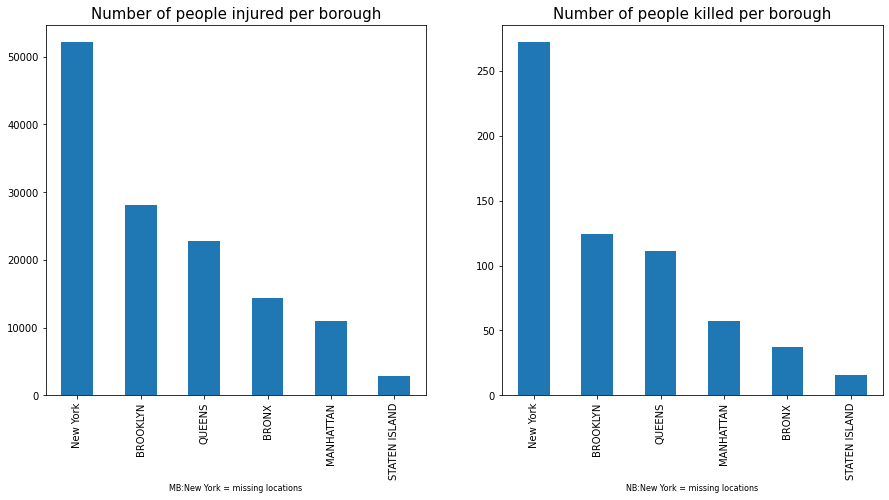

In [14]:
#checking some insights for brough number of killed and injured 
fig, ax = plt.subplots(1, figsize=(15, 15))

plt.subplot(2, 2 ,1)
Motor_vehicle_ds.groupby('BOROUGH').No_Injured.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of people injured per borough', fontsize=15)
plt.xlabel('MB:New York = missing locations', fontsize=8)

plt.subplot(2, 2 ,2)
Motor_vehicle_ds.groupby('BOROUGH').No_Killed.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of people killed per borough', fontsize=15)
plt.xlabel('NB:New York = missing locations', fontsize=8)

plt.show()

### Plotting New York map
- to be able to plot the location on mal we have to have shape file of the country I have download that from 

https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

### Viewing the shape file with boro name

0        Annotation(-73.9672, 40.7773, 'Manhattan')
1            Annotation(-73.8665, 40.8526, 'Bronx')
2         Annotation(-73.9478, 40.6448, 'Brooklyn')
3           Annotation(-73.8186, 40.7076, 'Queens')
4    Annotation(-74.1534, 40.5808, 'Staten Island')
dtype: object

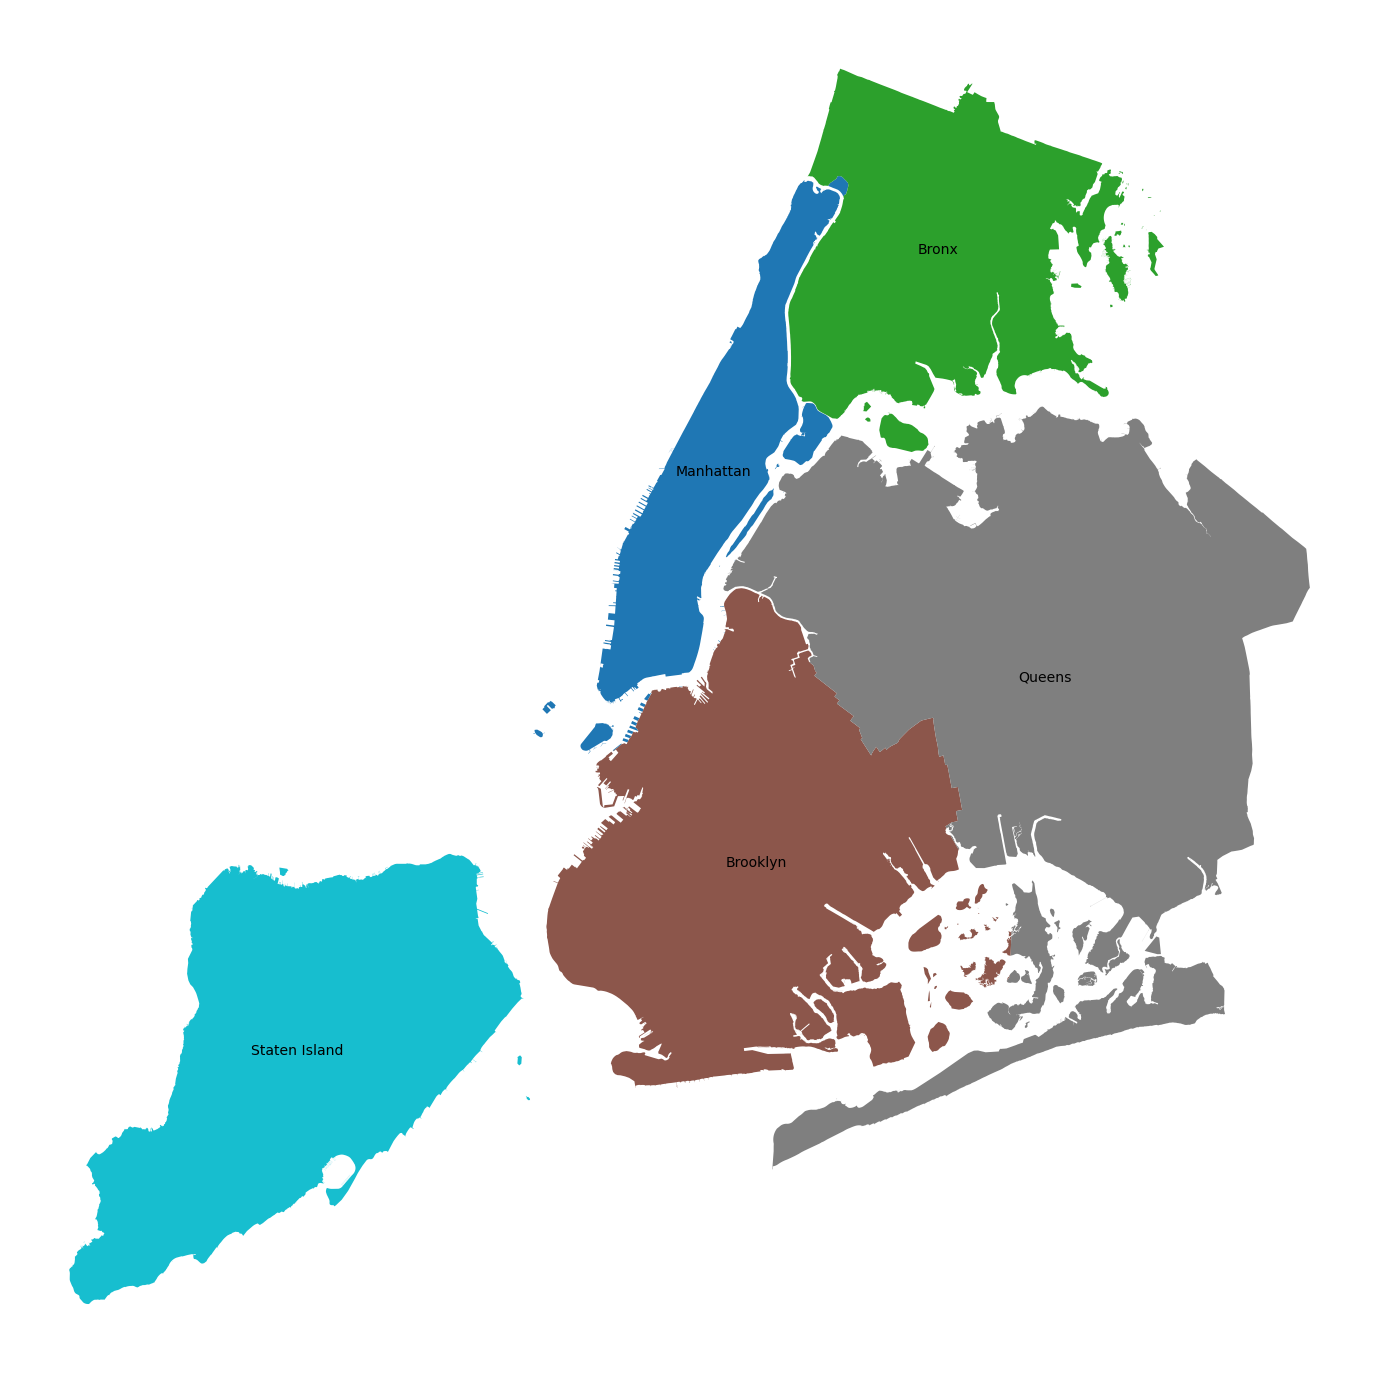

In [15]:
#loading the shape file and all other file you have downloaded from the link 
nymap=gpd.read_file('USA_GEO/geo_export_9077d58c-7dd0-4f2c-8834-ed59cd6a4202.shp')
fig,ax=plt.subplots(figsize=(25,25))
ax.axis('off')
nymap.plot(ax=ax,cmap='tab10', figsize=(50, 50))
nymap.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)

In [16]:
#create fill BOROUGH drop down list function to be filled with the unique BOROUGH names
ALL = 'ALL'
def fill_dropDown(array):
    unique = array.unique().tolist() 
    unique.insert(0, ALL)
    return unique
#assign the drop down widget after filling it to variable ddl_BOROUGH
ddl_BOROUGH = widgets.Dropdown(options =fill_dropDown(Motor_vehicle_ds.BOROUGH ))

hide_toggle('Fill BOROUGH drop down list')

In [17]:
#change boro to upper name in nymap dataframe to be identical to dropdown
nymap.boro_name=nymap.boro_name.apply(lambda x: x.upper())
# create zip x and y coordinates into single feature for our dataframe
geometry =gpd.points_from_xy(Motor_vehicle_ds.LONGITUDE, Motor_vehicle_ds.LATITUDE)
#set Coordinate Reference Systems refer to https://geopandas.org/projections.html for more information
crs={'init': 'epsg:4326'}
#change normal crash dataframe to geo dataframe to be understandable to the shape file
geo_df =gpd.GeoDataFrame(Motor_vehicle_ds,crs=crs,geometry=geometry )
geo_df['geometry']=geometry

In [18]:
#create drop down change the selection event handeler to change the map based on selection

def ddl_BOROUGH_eventhandler(change):
    plt.clf()
    plt.close()
    #clear out put everytime to avoid apeending 
    clear_output()
    
    #show the drop downlist 
    display(ddl_BOROUGH)
    fig,ax=plt.subplots(figsize=(20,20))
    
    if (change.new == ALL or ddl_BOROUGH.value=='New York'):
        #plotting new york map
        nymap.plot(ax=ax,cmap='tab10' ) 
        nymap.boundary.plot(ax=ax, color='Black', linewidth=1)
        geo_df.plot(column='C_Killed',ax=ax,markersize=20 ,marker='o',label='C_Killed')
        geo_df.plot(column='C_Injured',ax=ax,markersize=20 ,marker='^',label='C_Injured')
        
    else:
        #plotting new york map for filtered boro
        #filter by boro name
        nymap[nymap['boro_name']==ddl_BOROUGH.value].plot(ax=ax,cmap='GnBu' )
        nymap[nymap['boro_name']==ddl_BOROUGH.value].boundary.plot(ax=ax, color='Black', linewidth=1)
         
        geo_df[geo_df['BOROUGH']==ddl_BOROUGH.value].plot(column='C_Killed',ax=ax,markersize=20 ,marker='o',label='C_Killed')
        geo_df[geo_df['BOROUGH']==ddl_BOROUGH.value].plot(column='C_Injured',ax=ax,markersize=20 ,marker='^',label='C_Injured')
    #show boro name on the map
    nymap.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=20),axis=1)
     
  

    #adding CreditShelf company as a water mark
    ax.text(-0.05, 0.5, 'http://www.CreditShelf.com/', transform=ax.transAxes,
            fontsize=20, color='gray', alpha=0.5,
            ha='center', va='center', rotation='90')#plt.legend(property={size:15})
    #remove x,y axis 
    ax.axis('off') 
    #put bounding_box limites for the map you can find any bounding_box using https://www.mapdevelopers.com/geocode_bounding_box.php
    plt.xlim(- 74.15, - 73.7004)
    plt.ylim( 40.5774,40.9176) 

#add change event handeler 
ddl_BOROUGH.observe(ddl_BOROUGH_eventhandler, names='value')

hide_toggle('load map event based on drop down list selection ')

Dropdown(index=1, options=('ALL', 'New York', 'QUEENS', 'BRONX', 'MANHATTAN', 'BROOKLYN', 'STATEN ISLAND'), va…

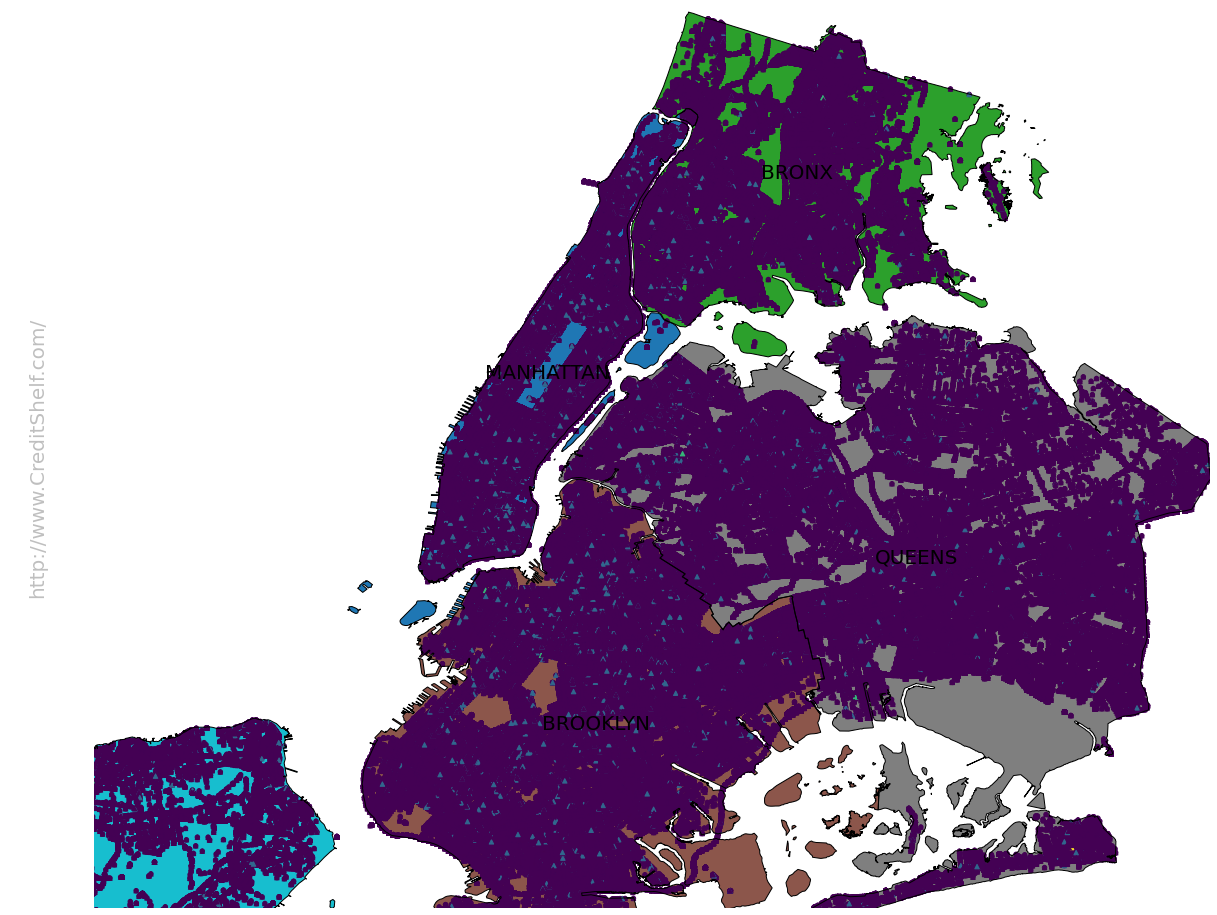

In [19]:
display(ddl_BOROUGH)